In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
# pip install mat73

In [5]:
# import mat73

In [6]:
# mat1=mat73.loadmat('/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_DB2_sEMG_preprocess_data.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_valid=mat1['Valid_raw_data']
# print('raw_Train_data',nina_raw_train)

In [7]:
# nina_raw_test=mat1['Testing_process_data'] 
# # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [8]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Train.csv", nina_raw_train, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [9]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Test.csv", nina_raw_test, delimiter=",")

In [10]:
N_FEATURES = 12

In [11]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'Class_label']


In [12]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [13]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [14]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [15]:
# import os
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/olsson_DB2/Total_process_TT/'
# olsson_path
# path='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_nb_olsson/Total_process_TT/'
# naveen_path
path='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/Total_process_TT/'

In [16]:
# file_path_train=path+'nina_pro_nb_DB2_Train'+'.'+'csv'
# file_path_train=path+'Train_data'+'.'+'csv'
file_path_train=path+'nina_pro_noprep_DB2_Train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/Total_process_TT/nina_pro_noprep_DB2_Train.csv


In [17]:
# file_path_test=path+'nina_pro_nb_DB2_Test'+'.'+'csv'
file_path_test=path+'nina_pro_noprep_DB2_Test'+'.'+'csv'
# file_path_test=path+'Test_data'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/Total_process_TT/nina_pro_noprep_DB2_Test.csv


In [18]:
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 78400000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,5.943400e-06,-0.000002,-2.139200e-06,-2.373100e-06,0.000002,-2.412000e-06,-2.303800e-06,-2.117200e-06,-1.011000e-06,-6.246100e-06,-7.141000e-07,0.000004,1.0
1,2.921800e-06,-0.000007,-1.804000e-06,-1.366000e-06,0.000003,-2.076100e-06,-6.253000e-07,3.254200e-06,7.830100e-07,-5.909500e-06,-1.049800e-06,0.000006,1.0
2,-4.353900e-07,-0.000009,5.453300e-07,-3.589800e-07,0.000004,-1.068800e-06,4.608700e-08,9.129100e-06,1.381800e-06,-3.726600e-06,-3.231800e-06,0.000007,1.0
3,-2.449800e-06,-0.000009,3.062600e-06,-3.590300e-07,0.000005,6.098500e-07,-1.296700e-06,8.793600e-06,8.353700e-07,-1.711600e-06,-4.071000e-06,0.000007,1.0
4,-3.792900e-06,-0.000007,4.237000e-06,-1.869700e-06,0.000007,7.779000e-07,-3.310900e-06,4.933200e-06,9.511400e-07,-2.046400e-06,-3.231700e-06,0.000004,1.0
5,-5.807300e-06,-0.000004,3.900800e-06,-1.701900e-06,0.000005,6.102500e-07,-3.310900e-06,3.254900e-06,8.782700e-07,-3.556200e-06,-1.888900e-06,0.000002,1.0
6,-6.646800e-06,-0.000002,2.221800e-06,-2.037700e-06,0.000002,6.104500e-07,-1.632400e-06,1.912300e-06,-6.752700e-07,-2.883900e-06,-8.817500e-07,0.000002,1.0
7,-5.975700e-06,-0.000001,1.885500e-06,-1.702000e-06,0.000003,1.114200e-06,-1.632400e-06,9.054400e-07,-2.069900e-06,-1.708100e-06,1.132500e-06,0.000002,1.0
8,-5.808100e-06,-0.000003,3.899200e-06,-1.030700e-06,0.000006,1.073100e-07,-3.982300e-06,-2.451300e-06,-8.001700e-07,-7.001100e-07,3.146700e-06,0.000003,1.0
9,-7.822500e-06,-0.000005,4.234400e-06,-1.030700e-06,0.000005,-3.960400e-07,-6.667900e-06,-6.311700e-06,8.353800e-07,1.400100e-07,3.818100e-06,0.000003,1.0


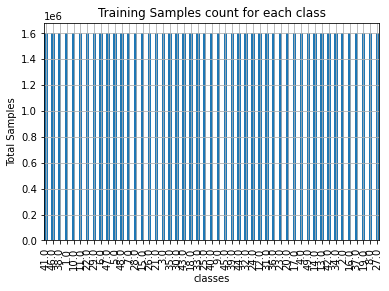

In [19]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [20]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(10)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 39200000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.000010,-4.268800e-06,0.000003,-1.681900e-06,-2.134200e-07,6.758300e-07,8.937700e-06,1.274300e-05,2.996900e-06,-4.196000e-07,2.792100e-07,-0.000014,1.0
1,0.000012,-3.933000e-06,0.000003,-1.681900e-06,1.297200e-06,-1.633900e-07,8.434400e-06,1.643500e-05,4.341200e-06,-1.425600e-06,-3.921700e-07,-0.000016,1.0
2,0.000012,-9.116800e-07,0.000004,-3.472700e-09,2.807900e-06,-8.347700e-07,5.916900e-06,1.643500e-05,2.768000e-06,-2.431600e-06,-1.063600e-06,-0.000017,1.0
3,0.000012,9.347200e-07,0.000006,2.178500e-06,3.479300e-06,1.515100e-06,2.895900e-06,1.425300e-05,9.824700e-07,-4.276900e-06,-1.063500e-06,-0.000019,1.0
4,0.000009,7.669300e-07,0.000005,2.010700e-06,4.150700e-06,3.529400e-06,3.783700e-07,9.553500e-06,2.326700e-06,-6.793500e-06,-2.742000e-06,-0.000021,1.0
5,0.000002,-9.115000e-07,0.000004,6.678200e-07,4.486400e-06,2.018700e-06,-1.132000e-06,2.000300e-06,2.935600e-06,-7.296000e-06,-3.916900e-06,-0.000022,1.0
6,-0.000002,-1.918500e-06,0.000003,-1.010700e-06,4.150700e-06,-1.841800e-06,-1.246800e-07,-2.699400e-06,2.492900e-06,-5.448600e-06,-1.734900e-06,-0.000028,1.0
7,-0.000005,-2.399800e-07,0.000002,-2.689200e-06,3.982800e-06,-4.191600e-06,4.340900e-08,-2.363700e-06,2.662100e-06,-4.104700e-06,6.150200e-07,-0.000034,1.0
8,-0.000005,9.578300e-08,0.000003,-3.360700e-06,4.486400e-06,-3.184500e-06,-1.131300e-06,1.329000e-06,2.935300e-06,-4.607200e-06,2.793300e-07,-0.000033,1.0
9,-0.000005,-3.429000e-06,0.000003,-3.025000e-06,5.157800e-06,-1.632200e-07,-4.596500e-07,9.933600e-07,3.331900e-06,-3.263300e-06,-3.920500e-07,-0.000026,1.0


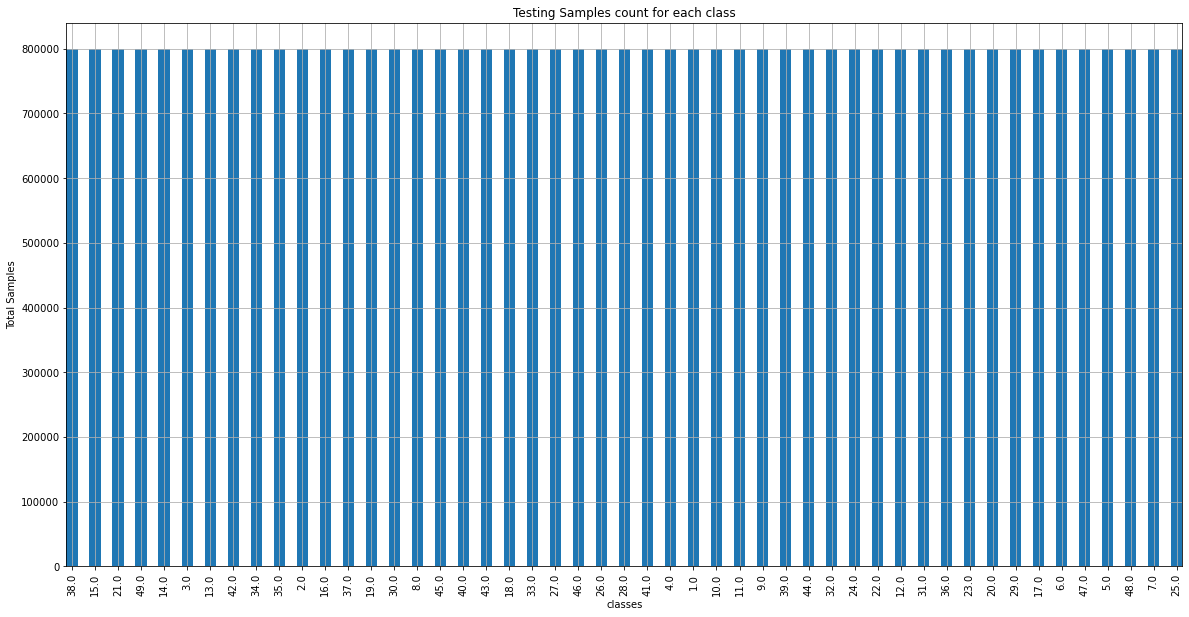

In [21]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [22]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00001,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00001,-0.00000,0.00000,1.00000
1,0.00000,-0.00001,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00001,-0.00000,0.00001,1.00000
2,-0.00000,-0.00001,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00001,0.00000,-0.00000,-0.00000,0.00001,1.00000
3,-0.00000,-0.00001,0.00000,-0.00000,0.00001,0.00000,-0.00000,0.00001,0.00000,-0.00000,-0.00000,0.00001,1.00000
4,-0.00000,-0.00001,0.00000,-0.00000,0.00001,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,1.00000


In [23]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [24]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [25]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.06118,-0.03152,-0.04886,-0.04987,0.16634,-0.03802,-0.02753,-0.03932,-0.02001,-0.04300,-0.02551,0.32388,1.00000
1,0.03204,-0.10486,-0.03937,-0.02573,0.25097,-0.03193,-0.01577,0.05363,0.02079,-0.04083,-0.03845,0.48810,1.00000
2,-0.00034,-0.14414,0.02712,-0.00159,0.28538,-0.01367,-0.01107,0.15529,0.03441,-0.02676,-0.12256,0.57018,1.00000
3,-0.01976,-0.13629,0.09836,-0.00160,0.39681,0.01677,-0.02047,0.14948,0.02198,-0.01377,-0.15491,0.54275,1.00000
4,-0.03272,-0.11010,0.13159,-0.03781,0.49244,0.01982,-0.03458,0.08268,0.02462,-0.01592,-0.12256,0.30995,1.00000


In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.00001,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00001,0.00001,0.00000,-0.00000,0.00000,-0.00001,1.00000
1,0.00001,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00001,0.00002,0.00000,-0.00000,-0.00000,-0.00002,1.00000
2,0.00001,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00001,0.00002,0.00000,-0.00000,-0.00000,-0.00002,1.00000
3,0.00001,0.00000,0.00001,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,-0.00000,-0.00000,-0.00002,1.00000
4,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00000,-0.00001,-0.00000,-0.00002,1.00000


In [27]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [28]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.10454,-0.06706,0.09738,-0.03331,-0.01486,0.01797,0.05120,0.21783,0.07115,-0.00544,0.01278,-1.15454,1.00000
1,0.11749,-0.06182,0.08788,-0.03331,0.09923,0.00275,0.04768,0.28171,0.10173,-0.01192,-0.01310,-1.27770,1.00000
2,0.11748,-0.01468,0.12588,0.00693,0.21333,-0.00942,0.03005,0.28171,0.06594,-0.01841,-0.03898,-1.38707,1.00000
3,0.11910,0.01413,0.16864,0.05923,0.26403,0.03318,0.00889,0.24395,0.02533,-0.03031,-0.03898,-1.56496,1.00000
4,0.09158,0.01151,0.14963,0.05521,0.31474,0.06970,-0.00874,0.16263,0.05591,-0.04653,-0.10368,-1.68811,1.00000


In [29]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size                C1       C2       C3       C4       C5       C6       C7  \
0         0.06118 -0.03152 -0.04886 -0.04987  0.16634 -0.03802 -0.02753   
1         0.03204 -0.10486 -0.03937 -0.02573  0.25097 -0.03193 -0.01577   
2        -0.00034 -0.14414  0.02712 -0.00159  0.28538 -0.01367 -0.01107   
3        -0.01976 -0.13629  0.09836 -0.00160  0.39681  0.01677 -0.02047   
4        -0.03272 -0.11010  0.13159 -0.03781  0.49244  0.01982 -0.03458   
...           ...      ...      ...      ...      ...      ...      ...   
78399995  0.13355 -0.03837 -1.72692 -0.03894 -0.27301 -0.00240  0.01655   
78399996  0.13796 -0.02004 -0.81962  0.01336 -0.09553  0.00368  0.02008   
78399997  0.07033  0.03235 -0.29708  0.06969 -0.04482 -0.00240  0.01185   
78399998 -0.03395  0.06639 -0.02157  0.12601 -0.15891 -0.04501 -0.00578   
78399999 -0.08442  0.09782  0.15894  0.15417 -0.24765 -0.06022 -0.03047   

               C8       C9      C10      C11     C12  Class_label  \
0        -0.0393

In [30]:
# The number of steps within one time segment
TIME_PERIODS = 10000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 10000

In [31]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [32]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [33]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [34]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (7839, 10000, 12)
7839 training samples
y_train shape:  (7839,)
10000
12
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0]
x_train shape: (10000, 12)
input_shape: (10000, 12)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (7839, 49)


In [35]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (3919, 10000, 12)
3919 testing samples
y_test shape:  (3919,)


In [36]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 25, 400
n_depth=12
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (7839, 25, 400, 12)
x_test shape:  (3919, 25, 400, 12)
n_outputs 49


In [37]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [38]:
verbose, epochs, batch_size = 0, 200, 16

In [39]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
model.add(TimeDistributed(Activation('tanh')))
model.add(TimeDistributed(Dropout(0.2093)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Flatten()))
# model.add(Flatten())
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.3))
# # model.add(Flatten())
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
model.add(Flatten())
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.3))
# model.add(Dense(2000, activation='tanh'))
model.add(Dense(512, activation='tanh'))
# model.add(Dense(200, activation='tanh'))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Dense(n_outputs, activation='softmax'))

In [40]:
adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/CNN100X100/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=75, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 25, 200, 64)       6976      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 25, 200, 64)       256       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 25, 97, 64)        0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 25, 97, 64)        0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 25, 49, 64)        20544     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 25, 49, 64)        256       
_________________________________________________________________
time_distributed_6 (TimeDist (None, 25, 49, 64)        0

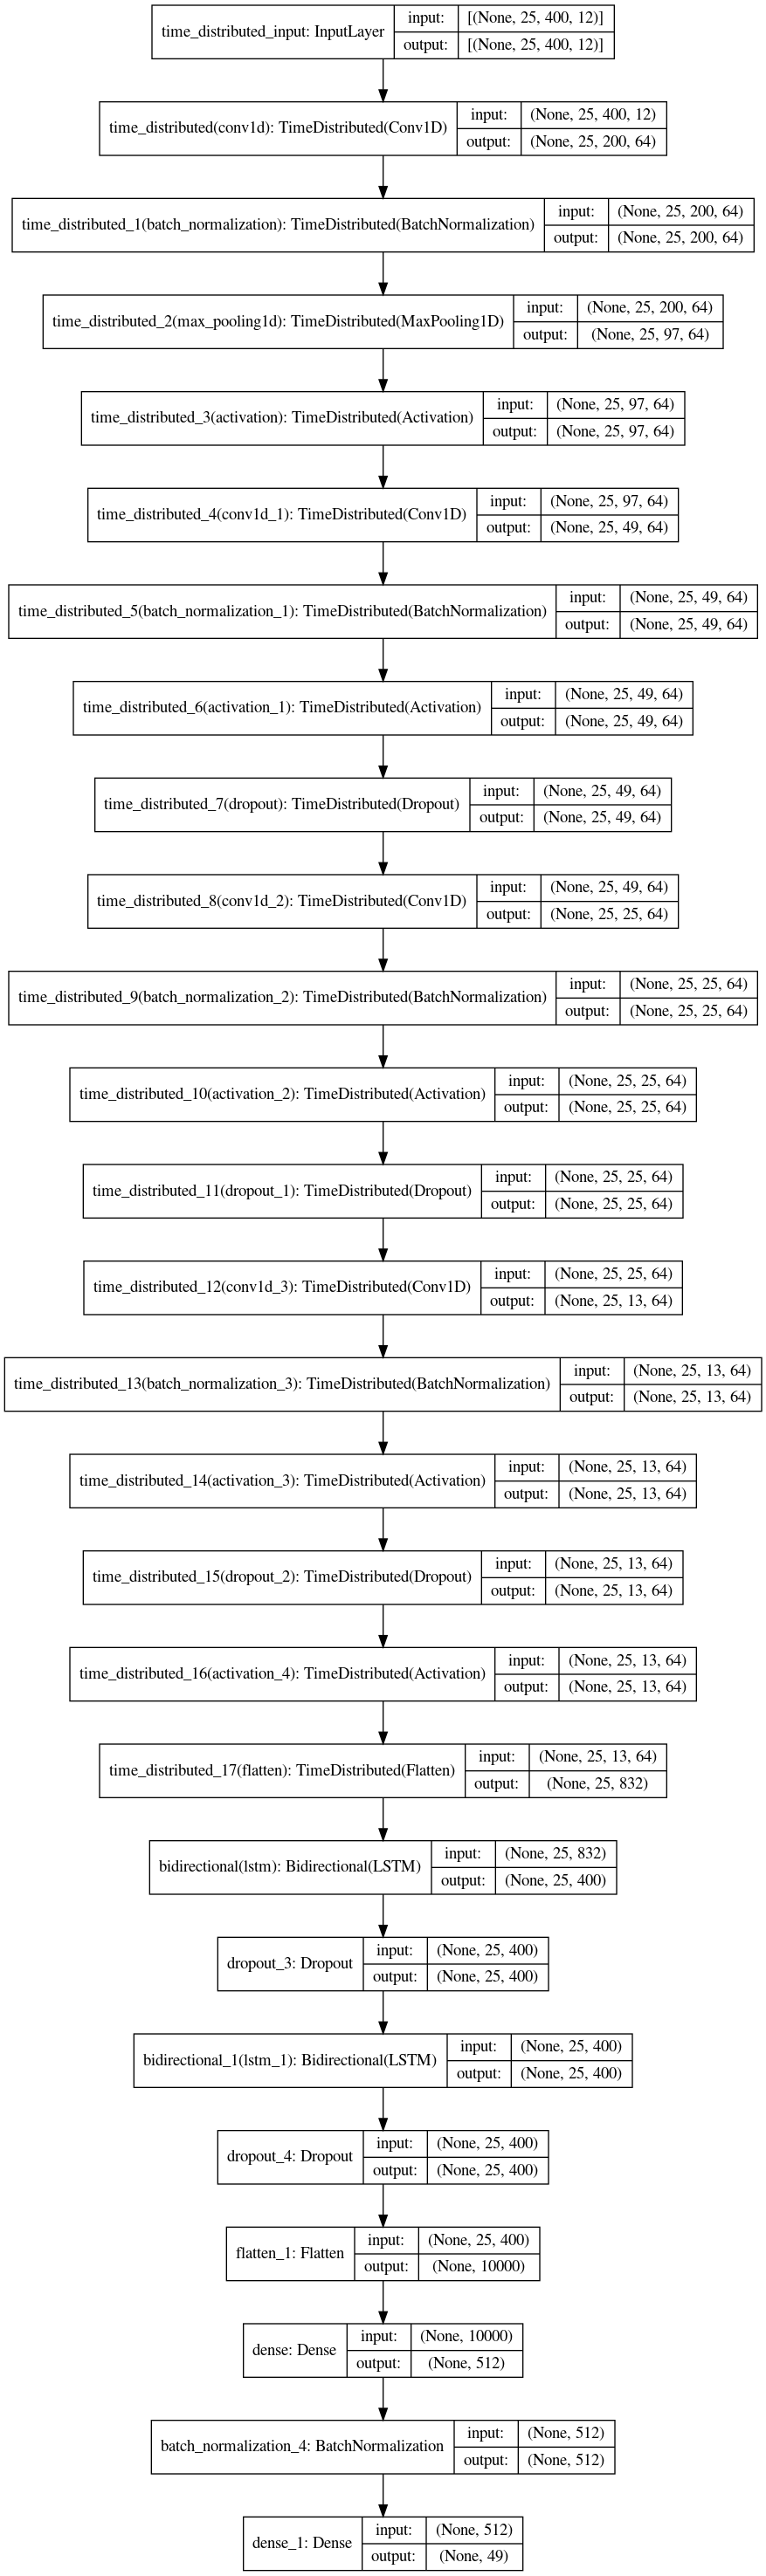

In [41]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/CNN100X100/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [42]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/CNN100X100/LSTM_ninaDB4_100X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/200
490/490 [==============================] - 39s 50ms/step - loss: 4.5264 - accuracy: 0.0806 - val_loss: 3.0035 - val_accuracy: 0.2756

Epoch 00001: val_accuracy improved from -inf to 0.27558, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/CNN100X100/checkpoint.hdf5
Epoch 2/200
490/490 [==============================] - 14s 29ms/step - loss: 2.6347 - accuracy: 0.3468 - val_loss: 2.2187 - val_accuracy: 0.4593

Epoch 00002: val_accuracy improved from 0.27558 to 0.45930, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/CNN100X100/checkpoint.hdf5
Epoch 3/200
490/490 [==============================] - 15s 30ms/step - loss: 1.9478 - accuracy: 0.5059 - val_loss: 1.8386 - val_accuracy: 0.5468

Epoch 00003: val_accuracy improved from 0.45930 to 0.54682, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/CNN100X100/checkpoint.hdf5
Epoch 4/200
490/490 [==============================] - 15s 32ms/step - loss: 1.5662 - ac

490/490 [==============================] - 14s 30ms/step - loss: 0.2655 - accuracy: 0.9548 - val_loss: 1.3400 - val_accuracy: 0.7637

Epoch 00036: val_accuracy did not improve from 0.78234
Epoch 37/200
490/490 [==============================] - 14s 29ms/step - loss: 0.2609 - accuracy: 0.9547 - val_loss: 1.3425 - val_accuracy: 0.7681

Epoch 00037: val_accuracy did not improve from 0.78234
Epoch 38/200
490/490 [==============================] - 15s 31ms/step - loss: 0.2361 - accuracy: 0.9619 - val_loss: 1.3628 - val_accuracy: 0.7675

Epoch 00038: val_accuracy did not improve from 0.78234
Epoch 39/200
490/490 [==============================] - 15s 30ms/step - loss: 0.2671 - accuracy: 0.9540 - val_loss: 1.4562 - val_accuracy: 0.7637

Epoch 00039: val_accuracy did not improve from 0.78234
Epoch 40/200
490/490 [==============================] - 15s 30ms/step - loss: 0.2619 - accuracy: 0.9547 - val_loss: 1.4357 - val_accuracy: 0.7586

Epoch 00040: val_accuracy did not improve from 0.78234
Epo

490/490 [==============================] - 14s 29ms/step - loss: 0.1411 - accuracy: 0.9832 - val_loss: 1.3910 - val_accuracy: 0.7903

Epoch 00075: val_accuracy improved from 0.78974 to 0.79025, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/CNN100X100/checkpoint.hdf5
Epoch 76/200
490/490 [==============================] - 15s 30ms/step - loss: 0.1281 - accuracy: 0.9885 - val_loss: 1.5236 - val_accuracy: 0.7920

Epoch 00076: val_accuracy improved from 0.79025 to 0.79204, saving model to /media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/CNN100X100/checkpoint.hdf5
Epoch 77/200
490/490 [==============================] - 15s 30ms/step - loss: 0.1287 - accuracy: 0.9870 - val_loss: 1.5460 - val_accuracy: 0.7869

Epoch 00077: val_accuracy did not improve from 0.79204
Epoch 78/200
490/490 [==============================] - 15s 30ms/step - loss: 0.1217 - accuracy: 0.9864 - val_loss: 1.3770 - val_accuracy: 0.8017

Epoch 00078: val_accuracy improved from 0.79204 to 0

490/490 [==============================] - 15s 30ms/step - loss: 0.0644 - accuracy: 0.9964 - val_loss: 1.3072 - val_accuracy: 0.8196

Epoch 00108: val_accuracy did not improve from 0.82087
Epoch 109/200
490/490 [==============================] - 16s 32ms/step - loss: 0.0659 - accuracy: 0.9961 - val_loss: 1.3173 - val_accuracy: 0.8186

Epoch 00109: val_accuracy did not improve from 0.82087
Epoch 110/200
490/490 [==============================] - 15s 30ms/step - loss: 0.0630 - accuracy: 0.9963 - val_loss: 1.2995 - val_accuracy: 0.8163

Epoch 00110: val_accuracy did not improve from 0.82087
Epoch 111/200
490/490 [==============================] - 15s 31ms/step - loss: 0.0647 - accuracy: 0.9962 - val_loss: 1.3204 - val_accuracy: 0.8130

Epoch 00111: val_accuracy did not improve from 0.82087
Epoch 112/200
490/490 [==============================] - 15s 30ms/step - loss: 0.0595 - accuracy: 0.9976 - val_loss: 1.3215 - val_accuracy: 0.8188

Epoch 00112: val_accuracy did not improve from 0.82087

490/490 [==============================] - 14s 29ms/step - loss: 0.0441 - accuracy: 0.9984 - val_loss: 1.2864 - val_accuracy: 0.8244

Epoch 00147: val_accuracy did not improve from 0.82700
Epoch 148/200
490/490 [==============================] - 16s 32ms/step - loss: 0.0413 - accuracy: 0.9992 - val_loss: 1.2946 - val_accuracy: 0.8211

Epoch 00148: val_accuracy did not improve from 0.82700
Epoch 149/200
490/490 [==============================] - 15s 30ms/step - loss: 0.0451 - accuracy: 0.9978 - val_loss: 1.2631 - val_accuracy: 0.8209

Epoch 00149: val_accuracy did not improve from 0.82700
Epoch 150/200
490/490 [==============================] - 14s 28ms/step - loss: 0.0423 - accuracy: 0.9988 - val_loss: 1.2669 - val_accuracy: 0.8242

Epoch 00150: val_accuracy did not improve from 0.82700
Epoch 151/200
490/490 [==============================] - 14s 29ms/step - loss: 0.0457 - accuracy: 0.9973 - val_loss: 1.3378 - val_accuracy: 0.8209

Epoch 00151: val_accuracy did not improve from 0.82700

490/490 [==============================] - 14s 28ms/step - loss: 0.0389 - accuracy: 0.9981 - val_loss: 1.2857 - val_accuracy: 0.8257

Epoch 00185: val_accuracy did not improve from 0.82929
Epoch 186/200
490/490 [==============================] - 14s 28ms/step - loss: 0.0393 - accuracy: 0.9981 - val_loss: 1.2968 - val_accuracy: 0.8234

Epoch 00186: val_accuracy did not improve from 0.82929
Epoch 187/200
490/490 [==============================] - 14s 28ms/step - loss: 0.0393 - accuracy: 0.9985 - val_loss: 1.2580 - val_accuracy: 0.8270

Epoch 00187: val_accuracy did not improve from 0.82929
Epoch 188/200
490/490 [==============================] - 14s 28ms/step - loss: 0.0404 - accuracy: 0.9977 - val_loss: 1.2858 - val_accuracy: 0.8267

Epoch 00188: val_accuracy did not improve from 0.82929
Epoch 189/200
490/490 [==============================] - 14s 28ms/step - loss: 0.0378 - accuracy: 0.9990 - val_loss: 1.2934 - val_accuracy: 0.8209

Epoch 00189: val_accuracy did not improve from 0.82929

In [43]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 181
train accuracy and validation accuracy 0.998214066028595 0.8292931914329529


In [44]:
model.save('/media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/CNN100X100/CNN_LSTM_nina_5X97')

INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/CNN100X100/CNN_LSTM_nina_5X97/assets


INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/CNN100X100/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


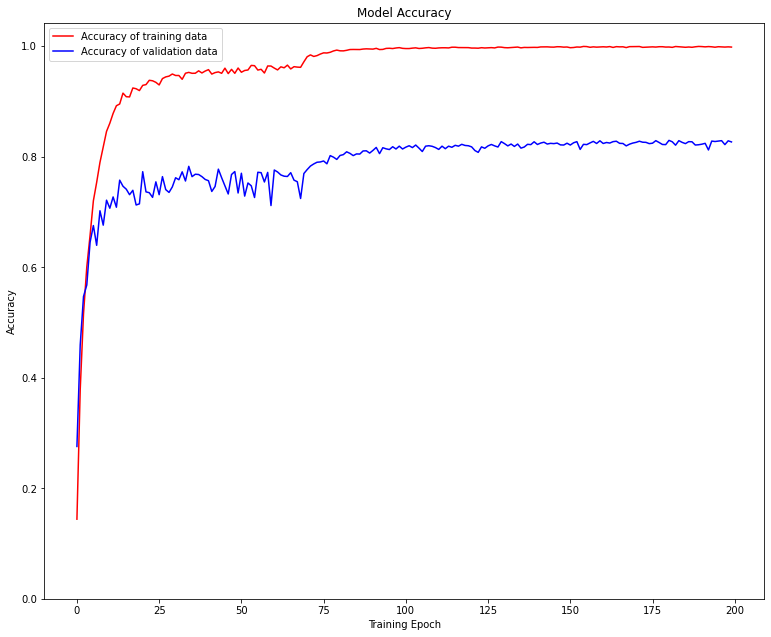

In [45]:
for i in history.history:
    print("history",i)
# facecolor='black'
DB2a=plt.figure(figsize=(10, 8),edgecolor='black')
# ax=figDB4.add_axes(("left", "bottom", "width", "height"))
ax= DB2a.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
# ax.spines["bottom"].set_linewidth(6)
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [46]:
import csv
print(len(history.history['loss']))
# print(history.history['loss'])
# result=csv.writer(open("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/trainvsval.csv","w"))
# result = csv.reader(open("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/trainvsval.csv","r"))
train_data = history.history['loss']
val_data= history.history['val_loss']

file = open("/media/naveen/nav/mat_codes/nina_DB2_codes/prep_no_prep/CNN100X100/trainvsval.csv", 'w+', newline ='')

for i in range(len(train_data)):
    file.write("{}, {}\n".format(train_data[i], val_data[i]))
file.close()

200


In [47]:
result = csv.reader(open("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/CNN100X100/trainvsval.csv","r"))
# print(len(result))
train_data =[]
val_data=[]
for line in result:
#     data = line.split(" ")
    train_data.append(float(line[0]))
    val_data.append(float(line[1]))
# print(train_data)
# print(len(train_data))
# print(type(train_data))
# print(train_data)
# for i in range(len(train_data)):

ax= figDB2.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

figDB2=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

# ax.spines["top"].set_linewidth(3)
# ax.spines["top"].set_linestyle("-")
# ax.spines["bottom"].set_linewidth(3)
# ax.spines["bottom"].set_linestyle("-")
# ax.spines["left"].set_linewidth(3)
# ax.spines["left"].set_linestyle("-")
# ax.spines["right"].set_linewidth(3)
# ax.spines["right"].set_linestyle("-")

plt.plot(train_data, 'r-', linewidth=3,label='Loss of training data')
plt.plot(val_data, 'b-',linewidth=3, label='Loss of validation data')
plt.title('Loss curve for NinaPro DB2',fontsize=18, weight = 'bold')
plt.ylabel('Loss',fontsize=16, weight = 'bold')
plt.xlabel('no. of training epochs',fontsize=16, weight = 'bold')
plt.ylim(0)
plt.legend()
plt.show()

NameError: name 'figDB2' is not defined

In [ ]:
figDB2.savefig('/media/naveen/nav/plots/NinaPro_DB2_25X400.eps',transparent=False)
figDB2.savefig('/media/naveen/nav/plots/NinaPro_DB2_25X400.pdf',transparent=False)

In [ ]:
for i in history.history:
    print("history",i)
# facecolor='black'
# ax= figDB2.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black") 

figDB2=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 18

# figBPR.suptitle('test title', fontsize=20)
#plt.rc('xlabel', fontsize=14, weight = 'bold')
#plt.rc('ylabel', fontsize=14, weight = 'bold')

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=MEDIUM_SIZE )     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE, weight = 'bold')    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE )  # fontsize of the figure title

# ax=figBPR.add_axes(("left", "bottom", "width", "height"))
ax= figDB2.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
ax.spines["top"].set_linewidth(3)
ax.spines["top"].set_linestyle("-")
ax.spines["bottom"].set_linewidth(3)
ax.spines["bottom"].set_linestyle("-")
ax.spines["left"].set_linewidth(3)
ax.spines["left"].set_linestyle("-")
ax.spines["right"].set_linewidth(3)
ax.spines["right"].set_linestyle("-")
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['loss'], 'r-', linewidth=3, label='Loss on training data')
plt.plot(history.history['val_loss'], 'b-', linewidth=3, label='Loss on validation data')
plt.title('Loss curve for NinaPro DB2',fontsize=18, weight = 'bold')

plt.ylabel('Loss',fontsize=16, weight = 'bold')
plt.xlabel('no of training epochs',fontsize=16, weight = 'bold')
# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
import datetime

In [ ]:
model.load_weights(checkpoint_filepath) 
print(datetime.datetime.now())
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print(datetime.datetime.now())
print('test_accuracy',testaccuracy)

In [ ]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))